# Importa MURA Dataset from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cjinny/mura-v11")

print("Path to dataset files:", path)

100%|██████████| 3.14G/3.14G [00:21<00:00, 156MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1


Train CSV Sample:
                                               image
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3  MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4  MURA-v1.1/train/XR_SHOULDER/patient00002/study...

Validation CSV Sample:
                                               image
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...

Total Training Images: 36808
Total Validation Images: 3197


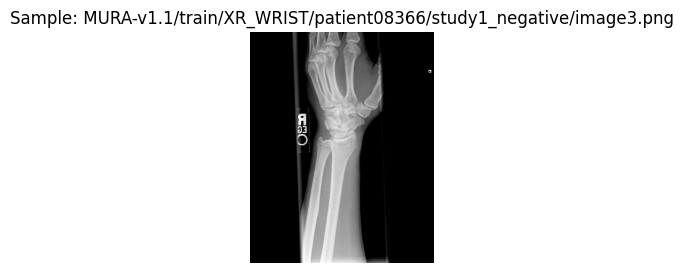

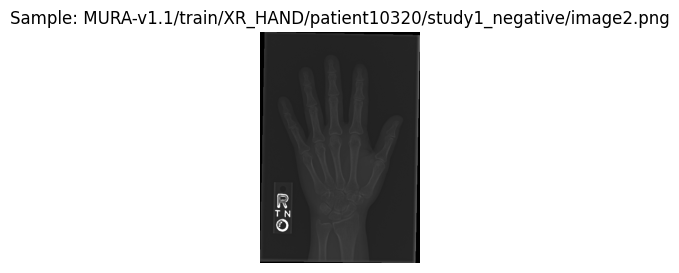

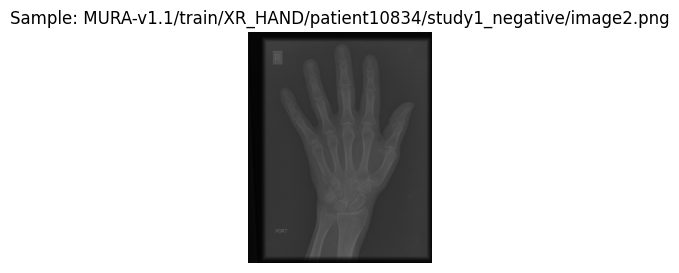

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# Dataset path
dataset_path = "/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1"

# Load CSVs with header=None to avoid misreading first row as header
train_csv = pd.read_csv(os.path.join(dataset_path, "MURA-v1.1/train_image_paths.csv"), header=None)
valid_csv = pd.read_csv(os.path.join(dataset_path, "MURA-v1.1/valid_image_paths.csv"), header=None)

# Rename the single column to 'image'
train_csv.columns = ["image"]
valid_csv.columns = ["image"]

# Display samples
print("Train CSV Sample:")
print(train_csv.head())
print("\nValidation CSV Sample:")
print(valid_csv.head())

print(f"\nTotal Training Images: {len(train_csv)}")
print(f"Total Validation Images: {len(valid_csv)}")

# Verify some random samples exist and show images
def show_random_samples(csv_df, base_path, n=3):
    sample_paths = random.sample(list(csv_df['image']), n)
    for img_rel_path in sample_paths:
        img_path = os.path.join(dataset_path, img_rel_path)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure(figsize=(3, 3))
            plt.imshow(img, cmap='gray')
            plt.title(f"Sample: {img_rel_path}")
            plt.axis('off')
            plt.show()
        else:
            print(f"⚠️ Image not found at: {img_path}")

# Show 3 random training samples
show_random_samples(train_csv, dataset_path)



=== Displaying sample images for TRAIN ===


TRAIN - Body Part: XR_ELBOW (showing 5 samples)



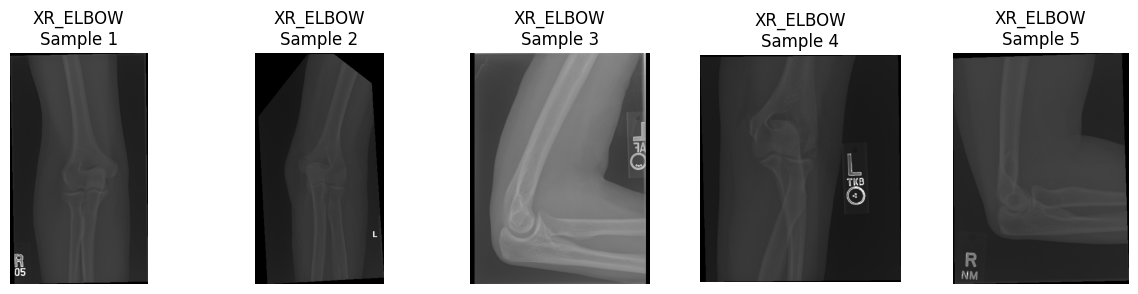


TRAIN - Body Part: XR_FINGER (showing 5 samples)



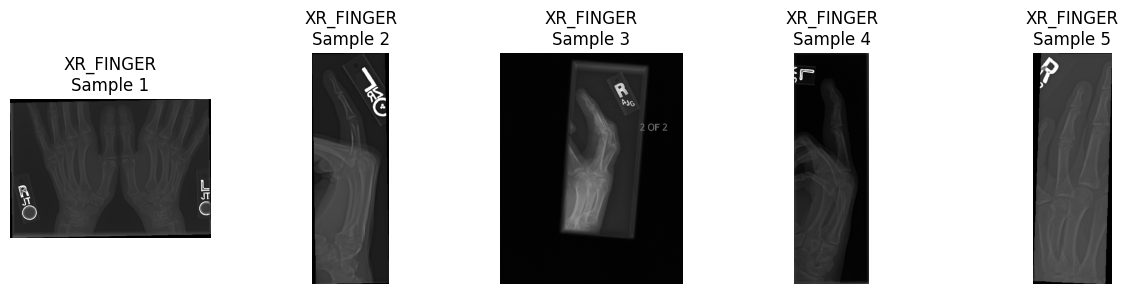


TRAIN - Body Part: XR_FOREARM (showing 5 samples)



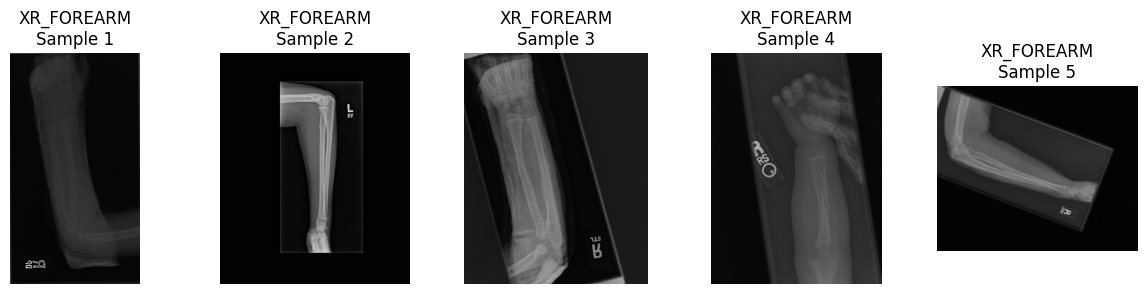


TRAIN - Body Part: XR_HAND (showing 5 samples)



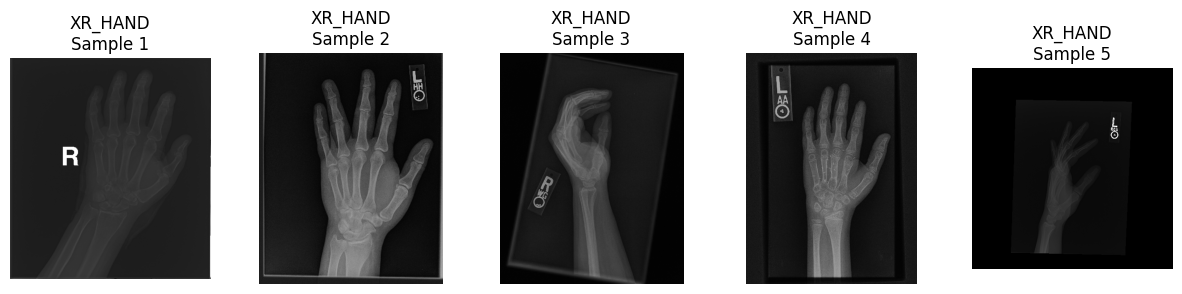


TRAIN - Body Part: XR_HUMERUS (showing 5 samples)



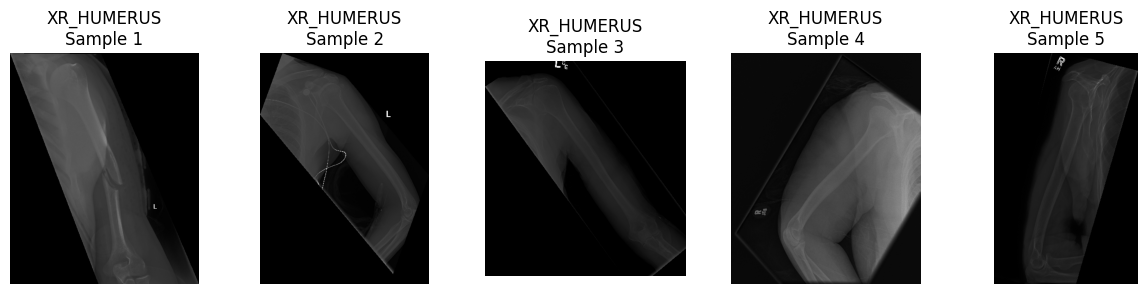


TRAIN - Body Part: XR_SHOULDER (showing 5 samples)



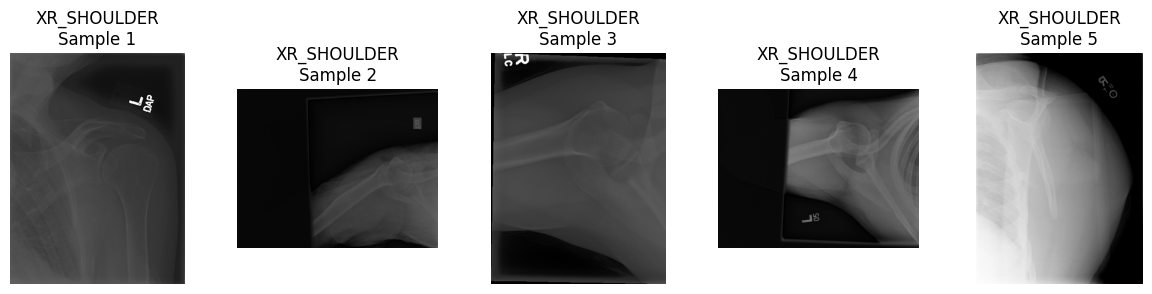


TRAIN - Body Part: XR_WRIST (showing 5 samples)



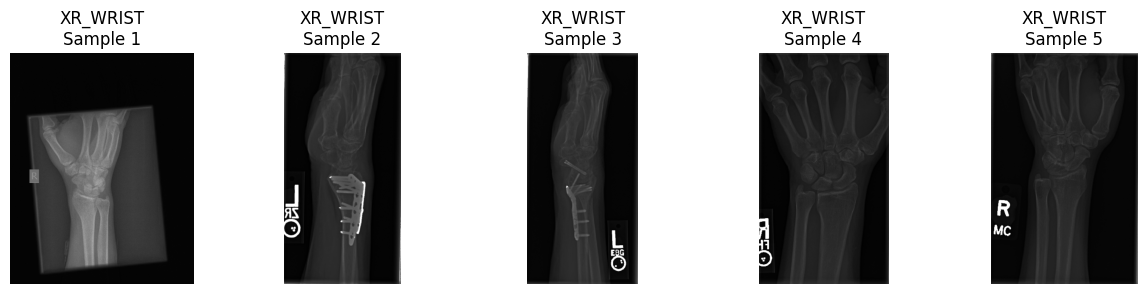


=== Displaying sample images for VALIDATION ===


VALIDATION - Body Part: XR_ELBOW (showing 5 samples)



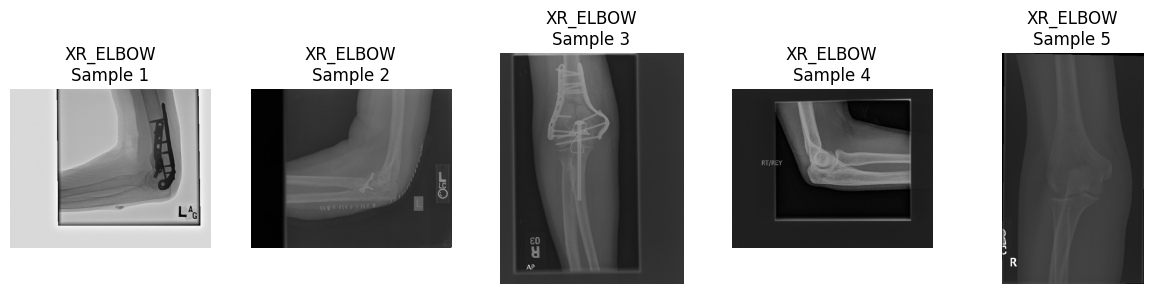


VALIDATION - Body Part: XR_FINGER (showing 5 samples)



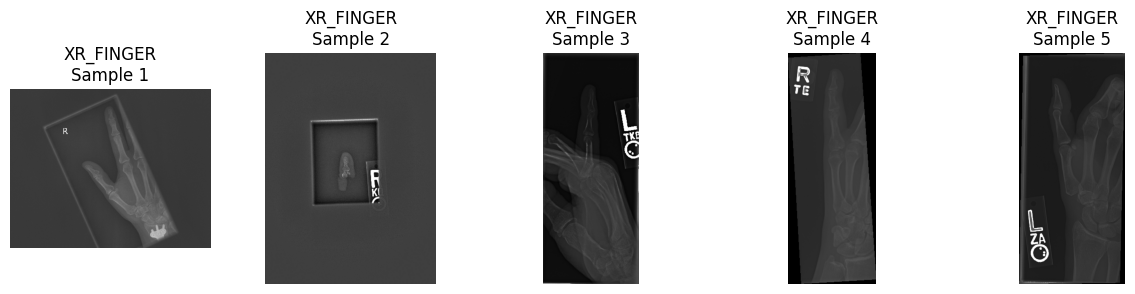


VALIDATION - Body Part: XR_FOREARM (showing 5 samples)



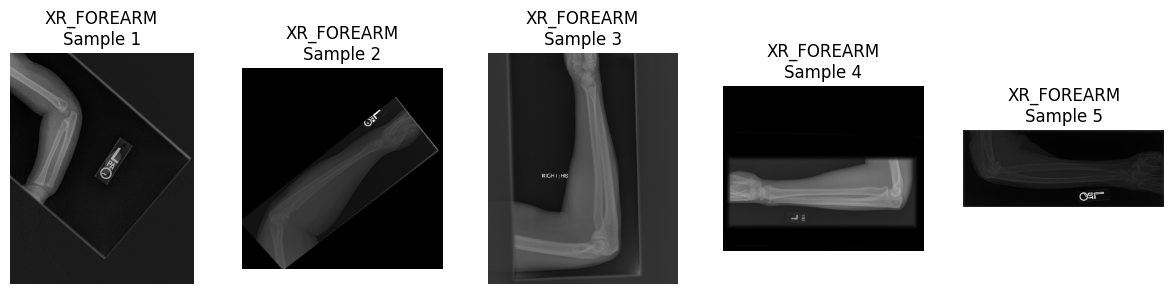


VALIDATION - Body Part: XR_HAND (showing 5 samples)



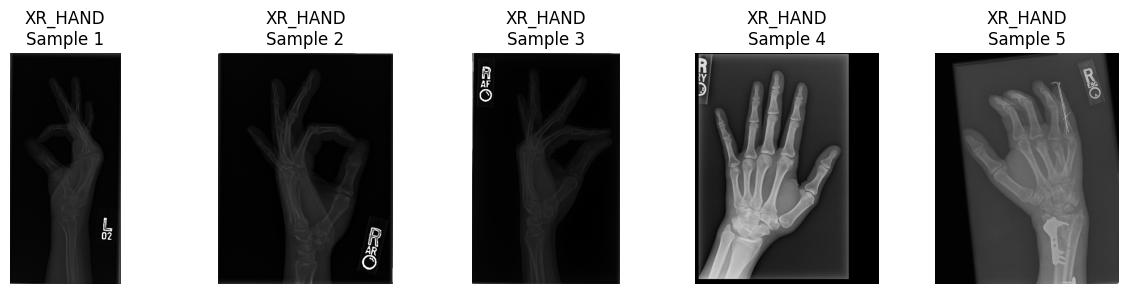


VALIDATION - Body Part: XR_HUMERUS (showing 5 samples)



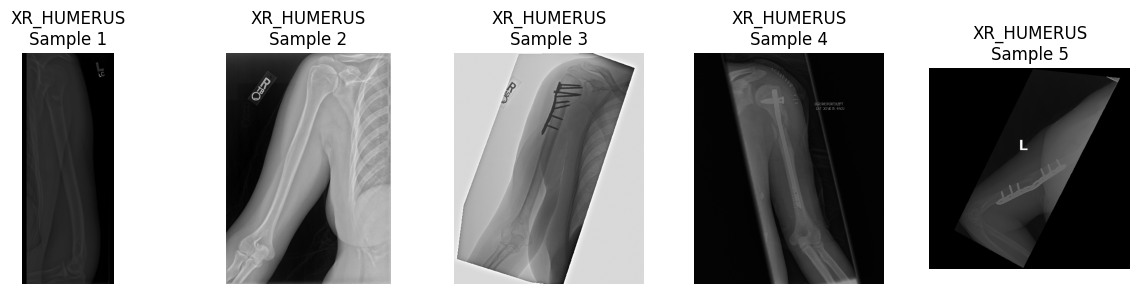


VALIDATION - Body Part: XR_SHOULDER (showing 5 samples)



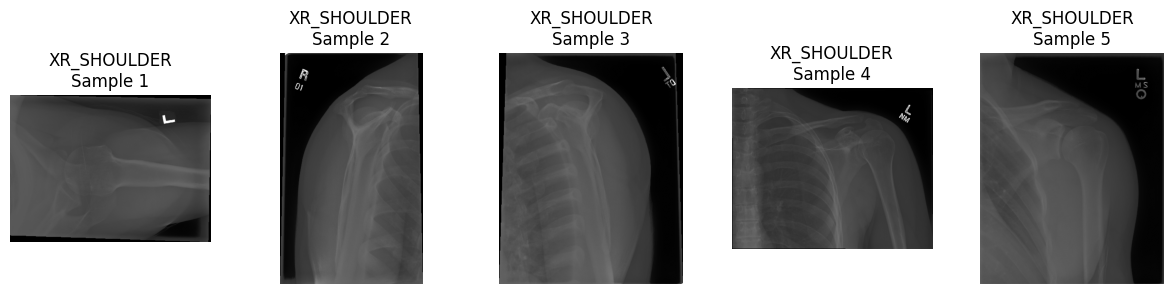


VALIDATION - Body Part: XR_WRIST (showing 5 samples)



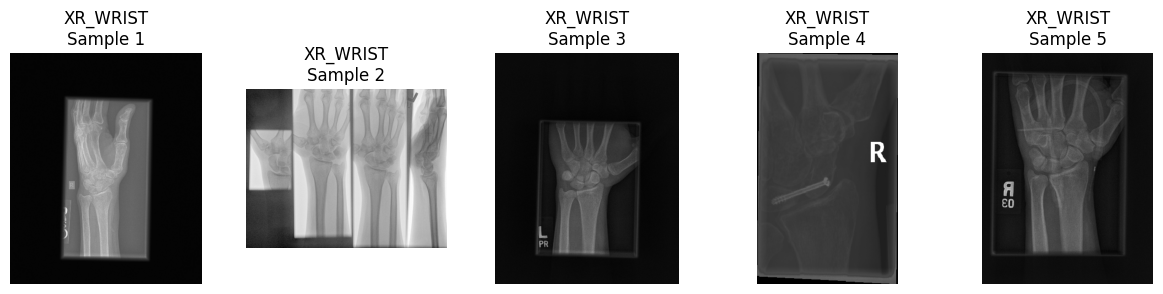

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Paths
dataset_path = "/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1/MURA-v1.1"

# Load CSVs
train_csv = pd.read_csv(os.path.join(dataset_path, "train_image_paths.csv"), header=None)
valid_csv = pd.read_csv(os.path.join(dataset_path, "valid_image_paths.csv"), header=None)
train_csv.columns = ["image"]
valid_csv.columns = ["image"]

# Function to display 5 sample images per folder
def display_samples_per_folder(csv_df, split_name, n_samples=5):
    print(f"\n=== Displaying sample images for {split_name.upper()} ===\n")

    # Extract body part from path (e.g., XR_WRIST)
    csv_df["body_part"] = csv_df["image"].apply(lambda x: x.split("/")[2])

    # Loop through each body part
    for body_part in sorted(csv_df["body_part"].unique()):
        part_df = csv_df[csv_df["body_part"] == body_part]
        sample_images = part_df.sample(n=min(n_samples, len(part_df)), random_state=42)

        print(f"\n{split_name.upper()} - Body Part: {body_part} (showing {len(sample_images)} samples)\n")

        plt.figure(figsize=(15, 3))
        for i, img_rel_path in enumerate(sample_images["image"]):
            img_path = os.path.join("/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1", img_rel_path)
            img = Image.open(img_path)
            plt.subplot(1, len(sample_images), i+1)
            plt.imshow(img, cmap='gray')
            plt.title(f"{body_part}\nSample {i+1}")
            plt.axis('off')
        plt.show()

# Display samples for both training and validation sets
display_samples_per_folder(train_csv, "train", n_samples=5)
display_samples_per_folder(valid_csv, "validation", n_samples=5)


In [5]:
# Install Captum for Explainable AI
!pip install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Step 1: Library Imports and Environment Setup

In [1]:
# ============================================================
# Step 1: Library Imports and Environment Setup
# ============================================================

# Core Python Libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# PyTorch Libraries for Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

# Scikit-learn for Metrics and Cross-Validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Explainable AI Libraries (Captum for PyTorch)
from captum.attr import IntegratedGradients, LayerLRP, visualization as viz
from captum.attr import LayerGradCam

# Image Processing
import cv2

# ============================================================
# Environment Setup
# ============================================================

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Create output directories for results and visualizations
output_dirs = ["outputs", "outputs/checkpoints", "outputs/xai_visuals", "outputs/metrics"]
for d in output_dirs:
    os.makedirs(d, exist_ok=True)

print("Environment setup complete. Directories created for outputs and results.")


Using device: cuda
Environment setup complete. Directories created for outputs and results.


# Step 2: Dataset Loading and Exploration


=== Dataset Summary ===

     Body Part  Train Images  Validation Images  Total Images
0     XR_ELBOW          4931                465          5396
1    XR_FINGER          5106                461          5567
2   XR_FOREARM          1825                301          2126
3      XR_HAND          5543                460          6003
4   XR_HUMERUS          1272                288          1560
5  XR_SHOULDER          8379                563          8942
6     XR_WRIST          9752                659         10411

Total Training Images: 36808
Total Validation Images: 3197

=== Displaying sample images for TRAIN ===



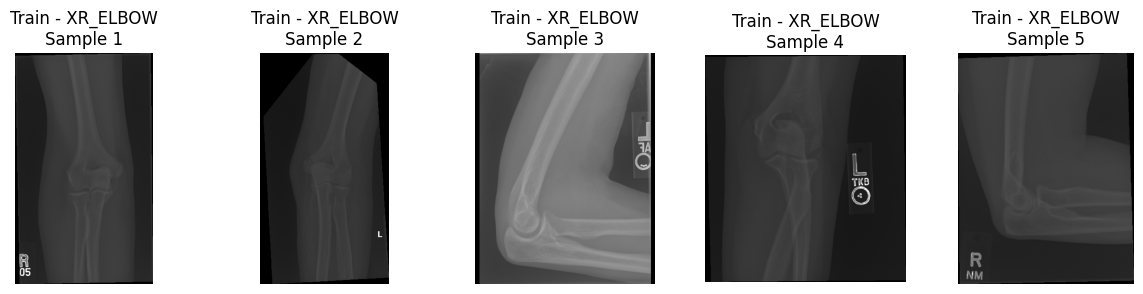

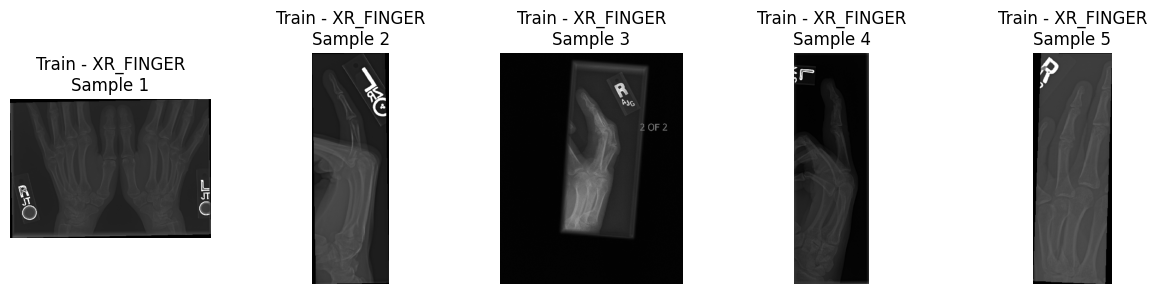

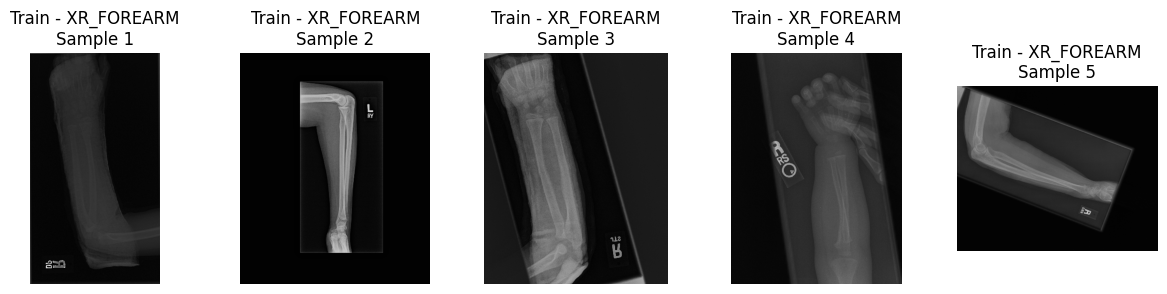

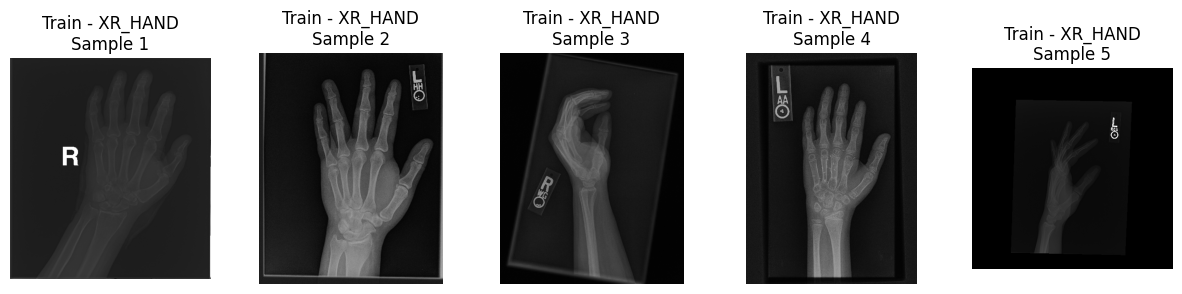

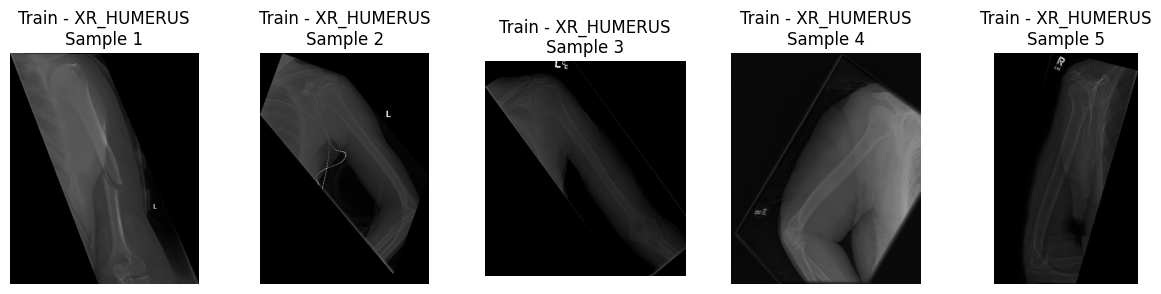

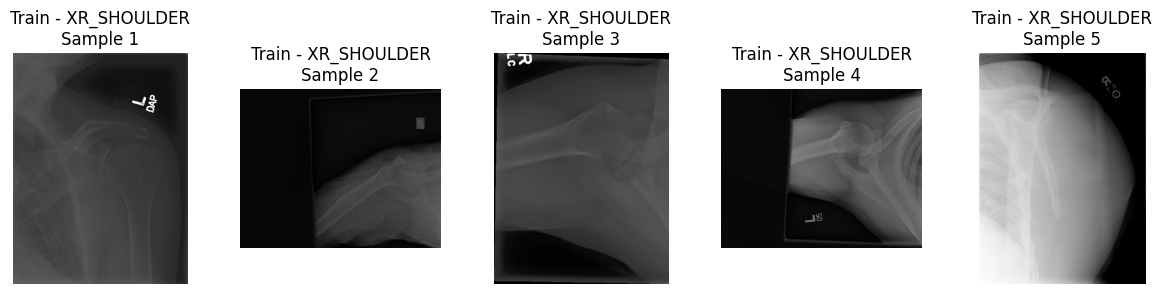

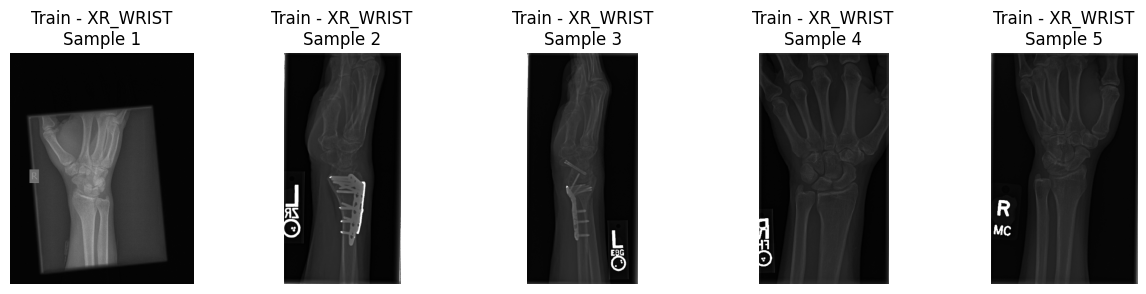


=== Displaying sample images for VALIDATION ===



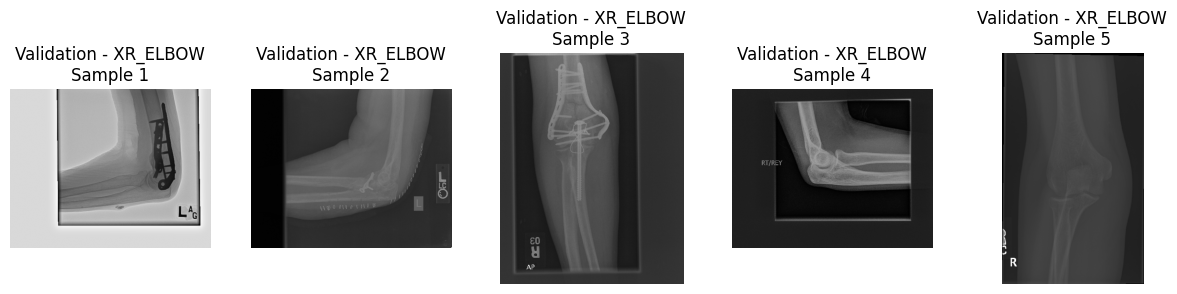

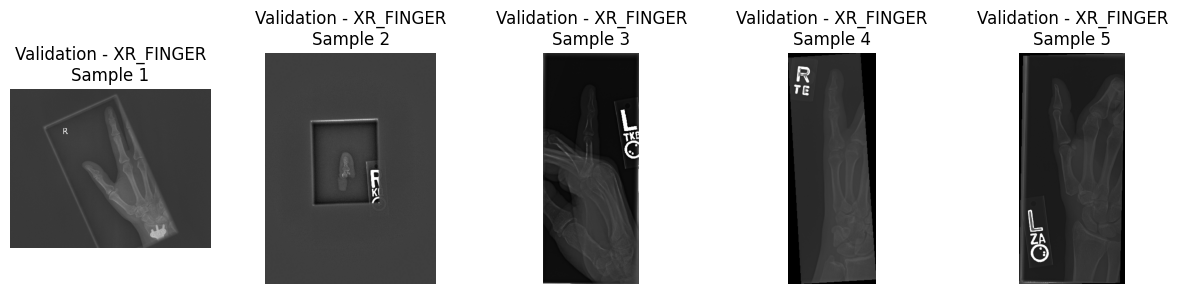

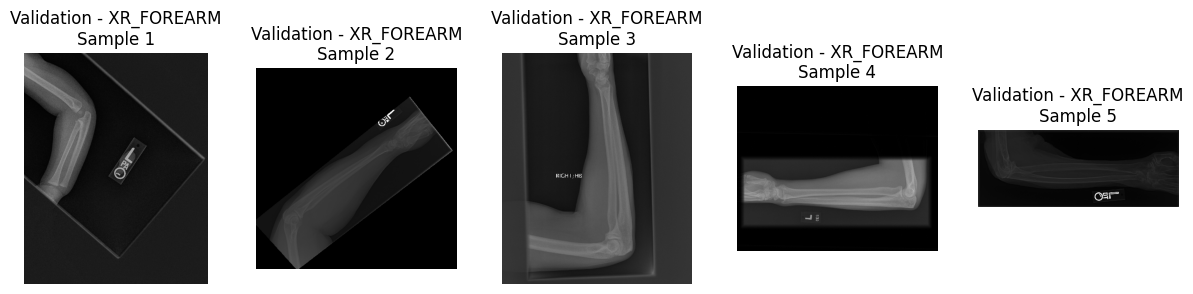

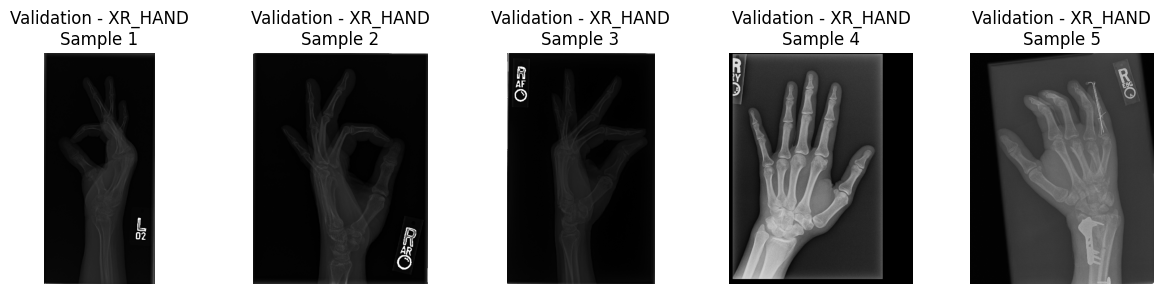

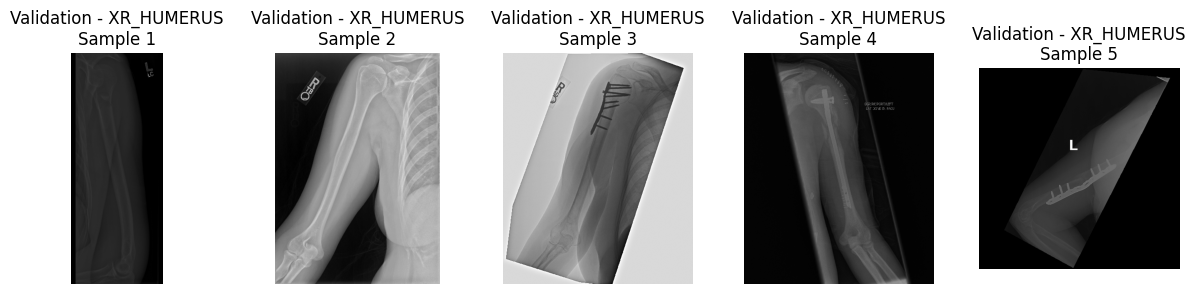

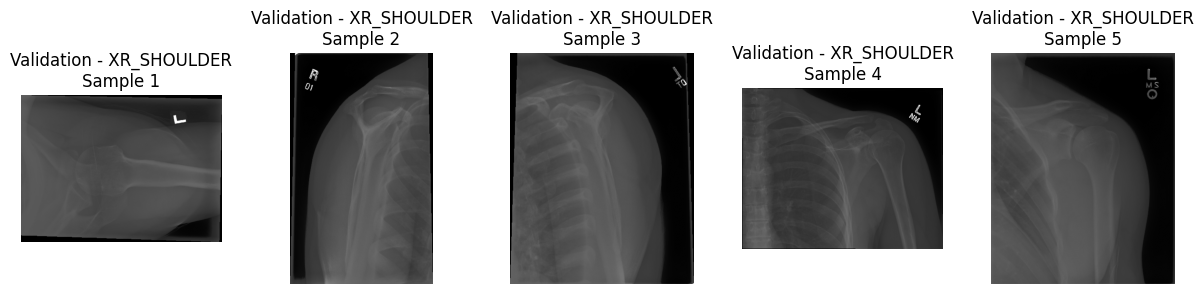

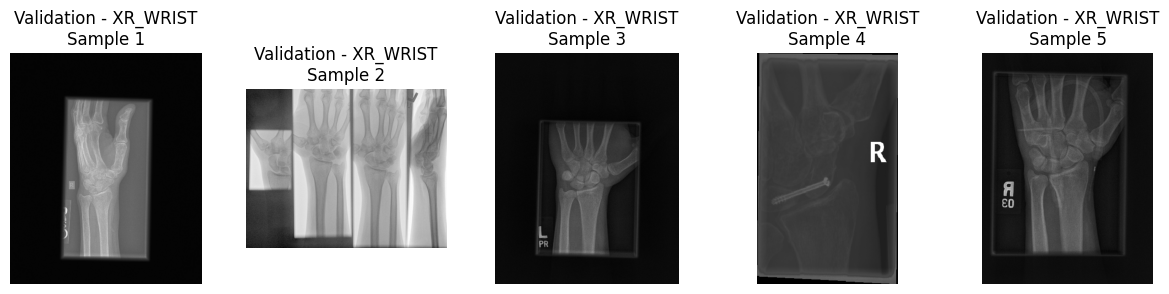

In [2]:
# ============================================================
# Step 2: Dataset Loading and Exploration
# ============================================================

import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to MURA dataset root (adjust if needed)
dataset_path = "/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1/MURA-v1.1"

# 2.1 Load CSV files (no header in original files)
train_csv = pd.read_csv(os.path.join(dataset_path, "train_image_paths.csv"), header=None)
valid_csv = pd.read_csv(os.path.join(dataset_path, "valid_image_paths.csv"), header=None)

# Rename column to 'image'
train_csv.columns = ["image"]
valid_csv.columns = ["image"]

# Add binary labels: 1 = abnormal (positive), 0 = normal (negative)
train_csv["label"] = train_csv["image"].apply(lambda x: 1 if "positive" in x else 0)
valid_csv["label"] = valid_csv["image"].apply(lambda x: 1 if "positive" in x else 0)

# Extract body part name from path (e.g., XR_WRIST, XR_ELBOW)
train_csv["body_part"] = train_csv["image"].apply(lambda x: x.split("/")[2])
valid_csv["body_part"] = valid_csv["image"].apply(lambda x: x.split("/")[2])

# 2.2 Dataset summary
summary_df = pd.DataFrame({
    "Body Part": sorted(train_csv["body_part"].unique()),
    "Train Images": train_csv.groupby("body_part").size().values,
    "Validation Images": valid_csv.groupby("body_part").size().values
})
summary_df["Total Images"] = summary_df["Train Images"] + summary_df["Validation Images"]
print("\n=== Dataset Summary ===\n")
print(summary_df)

print(f"\nTotal Training Images: {len(train_csv)}")
print(f"Total Validation Images: {len(valid_csv)}")

# ============================================================
# 2.3 Visualization: Display 5 sample images per body part
# ============================================================

def display_samples_per_folder(csv_df, split_name, n_samples=5):
    """
    Display n sample images per anatomical folder
    """
    print(f"\n=== Displaying sample images for {split_name.upper()} ===\n")
    for body_part in sorted(csv_df["body_part"].unique()):
        part_df = csv_df[csv_df["body_part"] == body_part]
        sample_images = part_df.sample(n=min(n_samples, len(part_df)), random_state=42)

        plt.figure(figsize=(15, 3))
        for i, img_rel_path in enumerate(sample_images["image"]):
            img_path = os.path.join("/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1", img_rel_path)
            img = Image.open(img_path)
            plt.subplot(1, len(sample_images), i+1)
            plt.imshow(img, cmap='gray')
            plt.title(f"{split_name} - {body_part}\nSample {i+1}")
            plt.axis('off')
        plt.show()

# Display sample images for both training and validation
display_samples_per_folder(train_csv, "Train", n_samples=5)
display_samples_per_folder(valid_csv, "Validation", n_samples=5)


# Step 3: Data Preprocessing and Augmentation

In [3]:
# ============================================================
# Step 3: Data Preprocessing and Augmentation (Revised)
# ============================================================
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from torchvision.transforms import InterpolationMode as IM
from PIL import Image
import numpy as np
import os

# Image size and ImageNet stats for pretrained models
img_size = 224
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

# 3.1 Data Augmentation (Training)
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),                 # replicate to 3ch
    transforms.RandomResizedCrop(img_size, scale=(0.85, 1.0),    # one resample op
                                 ratio=(0.95, 1.05),
                                 interpolation=IM.BILINEAR,
                                 antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10, interpolation=IM.BILINEAR),
    transforms.ColorJitter(brightness=0.10, contrast=0.10),      # mild for X-rays
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),
])

# 3.2 Validation Preprocessing (No heavy augmentation, keep aspect ratio)
valid_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize(int(img_size * 1.15), interpolation=IM.BILINEAR, antialias=True),  # resize shorter side
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),
])

class MURADataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        rel = self.data.loc[idx, "image"]
        label = self.data.loc[idx, "label"]
        path = os.path.join(self.root_dir, rel)
        img = Image.open(path)  # keep PIL; transform handles grayscale→3ch
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.float32)

# ---- class imbalance support (recommended) ----
num_pos = int((train_csv["label"] == 1).sum())
num_neg = int((train_csv["label"] == 0).sum())
w_pos = 1.0 / max(1, num_pos)
w_neg = 1.0 / max(1, num_neg)
sample_weights = train_csv["label"].apply(lambda y: w_pos if y == 1 else w_neg).values
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_dataset = MURADataset(train_csv, "/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1", transform=train_transform)
valid_dataset = MURADataset(valid_csv, "/root/.cache/kagglehub/datasets/cjinny/mura-v11/versions/1", transform=valid_transform)

batch_size = 32
num_workers = 2

# worker seeding for reproducibility
def _seed_worker(worker_id):
    seed = torch.initial_seed() % 2**32
    np.random.seed(seed)
    import random as _r
    _r.seed(seed)

g = torch.Generator()
g.manual_seed(42)

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    sampler=sampler,         # replaces shuffle for class balance
    num_workers=num_workers,
    pin_memory=True,
    persistent_workers=True,
    worker_init_fn=_seed_worker,
    generator=g
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True,
    persistent_workers=True,
    worker_init_fn=_seed_worker,
    generator=g
)

print(f"Training batches: {len(train_loader)} | Validation batches: {len(valid_loader)}")
sample_images, sample_labels = next(iter(train_loader))
print(sample_images.shape, sample_labels.shape)


Training batches: 1151 | Validation batches: 100
torch.Size([32, 3, 224, 224]) torch.Size([32])


# Step 4: Model Development and Training ResNet-50

In [4]:
# ============================
# ResNet-50 Training (Improved)
# ============================
import os, math, torch, torch.nn as nn, torch.optim as optim
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}")

# ---- 1) Build model with a stronger head (dropout) ----
def build_resnet50(num_classes=1, dropout_p=0.3):
    model = models.resnet50(weights="IMAGENET1K_V1")
    in_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(p=dropout_p),
        nn.Linear(in_features, num_classes)
    )
    return model.to(device)

model = build_resnet50()

# ---- 2) Class imbalance handling via pos_weight ----
# Assumes you still have train_csv with a "label" column (1=abnormal, 0=normal)
num_pos = int((train_csv["label"] == 1).sum())
num_neg = int((train_csv["label"] == 0).sum())
# pos_weight > 1 increases recall on the minority class
pos_weight_val = torch.tensor([max(1.0, num_neg / max(1, num_pos))], device=device, dtype=torch.float32)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_val)

# ---- 3) Optimizer & LR schedule ----
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.2, patience=2, verbose=True)

# ---- 4) AMP scaler for mixed precision ----
scaler = torch.cuda.amp.GradScaler(enabled=device.type == "cuda")

# ---- 5) Training / validation helpers ----
def _epoch_step(model, loader, train=True):
    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    all_probs, all_preds, all_labels = [], [], []

    for images, labels in loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        with torch.set_grad_enabled(train):
            with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
                logits = model(images).squeeze(1)  # [B]
                loss = criterion(logits, labels)

            if train:
                optimizer.zero_grad(set_to_none=True)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()

        total_loss += loss.item()
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        preds = (probs > 0.5).astype("int")
        all_probs.extend(probs.tolist())
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.detach().cpu().numpy().tolist())

    # Metrics
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, zero_division=0)
    rec = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    try:
        auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        auc = float("nan")

    avg_loss = total_loss / max(1, len(loader))
    return avg_loss, acc, prec, rec, f1, auc

# ---- 6) Train loop with early stopping & checkpointing ----
def train_resnet50(
    model,
    train_loader,
    valid_loader,
    epochs=20,
    patience=4,
    ckpt_path="outputs/checkpoints/best_resnet50.pth"
):
    best_val = math.inf
    wait = 0

    for epoch in range(1, epochs + 1):
        train_loss, tr_acc, tr_prec, tr_rec, tr_f1, tr_auc = _epoch_step(model, train_loader, train=True)
        val_loss, va_acc, va_prec, va_rec, va_f1, va_auc = _epoch_step(model, valid_loader, train=False)
        scheduler.step(val_loss)

        print(
            f"Epoch {epoch:02d}/{epochs} | "
            f"Train: loss {train_loss:.4f}, acc {tr_acc:.4f}, prec {tr_prec:.4f}, rec {tr_rec:.4f}, f1 {tr_f1:.4f}, auc {tr_auc:.4f} | "
            f"Val: loss {val_loss:.4f}, acc {va_acc:.4f}, prec {va_prec:.4f}, rec {va_rec:.4f}, f1 {va_f1:.4f}, auc {va_auc:.4f}"
        )

        # Save best by validation loss (more stable early)
        if val_loss < best_val:
            best_val = val_loss
            wait = 0
            os.makedirs(os.path.dirname(ckpt_path), exist_ok=True)
            torch.save(model.state_dict(), ckpt_path)
            print(f"  ↳ Best checkpoint saved to {ckpt_path}")
        else:
            wait += 1
            if wait >= patience:
                print("  ↳ Early stopping triggered.")
                break

    return ckpt_path

# ---- 7) Kick off training ----
best_ckpt = train_resnet50(model, train_loader, valid_loader, epochs=20, patience=4)

# ---- 8) Load best and (optionally) run a final validation pass ----
model.load_state_dict(torch.load(best_ckpt, map_location=device))
final_val = _epoch_step(model, valid_loader, train=False)
print("\nFinal (best) validation -> loss {:.4f}, acc {:.4f}, prec {:.4f}, rec {:.4f}, f1 {:.4f}, auc {:.4f}".format(*final_val))


Training on device: cuda


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/tmp/ipython-input-3159317857.py:37: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=device.type == "cuda")
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with 

Epoch 01/20 | Train: loss 0.6202, acc 0.7388, prec 0.7193, rec 0.7826, f1 0.7496, auc 0.8237 | Val: loss 0.6064, acc 0.7304, prec 0.6879, rec 0.7993, f1 0.7394, auc 0.8378
  ↳ Best checkpoint saved to outputs/checkpoints/best_resnet50.pth


/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 02/20 | Train: loss 0.5521, acc 0.7848, prec 0.7744, rec 0.8038, f1 0.7888, auc 0.8654 | Val: loss 0.5558, acc 0.7823, prec 0.7453, rec 0.8281, f1 0.7845, auc 0.8688
  ↳ Best checkpoint saved to outputs/checkpoints/best_resnet50.pth


/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 03/20 | Train: loss 0.5383, acc 0.7888, prec 0.7795, rec 0.8096, f1 0.7943, auc 0.8725 | Val: loss 0.6119, acc 0.7851, prec 0.8714, rec 0.6464, f1 0.7422, auc 0.8572


/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 04/20 | Train: loss 0.5089, acc 0.8072, prec 0.8013, rec 0.8193, f1 0.8102, auc 0.8874 | Val: loss 0.6225, acc 0.7870, prec 0.8388, rec 0.6869, f1 0.7553, auc 0.8513


/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 05/20 | Train: loss 0.4915, acc 0.8157, prec 0.8055, rec 0.8330, f1 0.8190, auc 0.8962 | Val: loss 0.6290, acc 0.7867, prec 0.8470, rec 0.6765, f1 0.7522, auc 0.8534


/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 06/20 | Train: loss 0.4279, acc 0.8467, prec 0.8413, rec 0.8522, f1 0.8467, auc 0.9220 | Val: loss 0.5750, acc 0.8073, prec 0.8187, rec 0.7673, f1 0.7922, auc 0.8767
  ↳ Early stopping triggered.


/tmp/ipython-input-3159317857.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):



Final (best) validation -> loss 0.5558, acc 0.7823, prec 0.7453, rec 0.8281, f1 0.7845, auc 0.8688


=== Validation Metrics (ResNet-50) ===
Accuracy   : 0.7820
Precision  : 0.7449
Recall     : 0.8281
F1-score   : 0.7843
AUC-ROC    : 0.8687

=== Classification Report ===
              precision    recall  f1-score   support

      Normal       0.82      0.74      0.78      1667
    Abnormal       0.74      0.83      0.78      1530

    accuracy                           0.78      3197
   macro avg       0.78      0.78      0.78      3197
weighted avg       0.79      0.78      0.78      3197



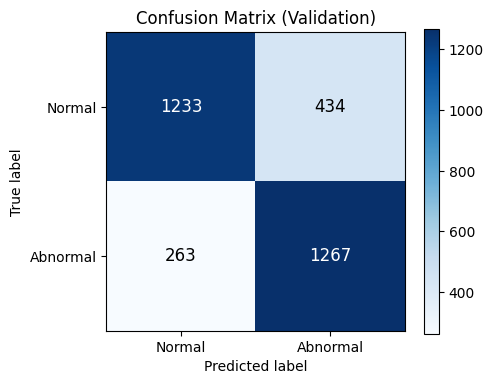

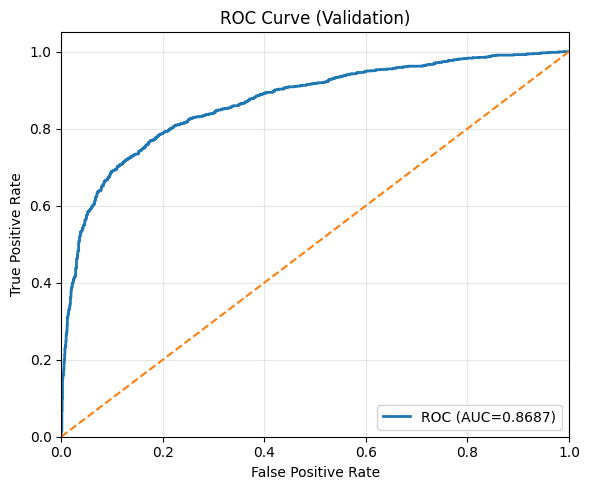

In [7]:
# ===== Evaluate saved ResNet-50 checkpoint and plot CM + ROC =====
import os, numpy as np, torch, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, \
                            accuracy_score, precision_score, recall_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fig_dir = "outputs/figures"; os.makedirs(fig_dir, exist_ok=True)

# (Assumes `model` is your ResNet-50 architecture as in training code)
ckpt_path = "outputs/checkpoints/best_resnet50.pth"
model.load_state_dict(torch.load(ckpt_path, map_location=device))
model.to(device); model.eval()

y_true, y_prob, y_pred = [], [], []
with torch.no_grad():
    for images, labels in valid_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        logits = model(images).squeeze(1)          # shape [B]
        probs  = torch.sigmoid(logits)
        preds  = (probs > 0.5).long()

        y_true.extend(labels.cpu().numpy())
        y_prob.extend(probs.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

y_true = np.array(y_true); y_prob = np.array(y_prob); y_pred = np.array(y_pred)

# Scalar metrics + report
acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

print("=== Validation Metrics (ResNet-50) ===")
print(f"Accuracy   : {acc:.4f}")
print(f"Precision  : {prec:.4f}")
print(f"Recall     : {rec:.4f}")
print(f"F1-score   : {f1:.4f}")
print(f"AUC-ROC    : {roc_auc:.4f}\n")

report = classification_report(y_true, y_pred, target_names=["Normal","Abnormal"])
print("=== Classification Report ===")
print(report)

# Optionally save report
with open(os.path.join("outputs/metrics", "classification_report_resnet50.txt"), "w") as f:
    f.write(report)

# Confusion Matrix plot
cm = confusion_matrix(y_true, y_pred, labels=[0,1])

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (Validation)')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ['Normal','Abnormal'])
plt.yticks(ticks, ['Normal','Abnormal'])
thresh = cm.max()/2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, int(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=12)
plt.ylabel('True label'); plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "cm_resnet50.png"), dpi=220)
plt.show()

# ROC curve plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC={roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation)')
plt.legend(loc='lower right'); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "roc_resnet50.png"), dpi=220)
plt.show()


# DenseNet-121: Dev & Training

In [18]:
# ===============================
# DenseNet-121: Dev & Training
# ===============================
import os, math, torch, torch.nn as nn, torch.optim as optim
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 0) Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"DenseNet training on: {device}")

# 1) Build model with stronger classifier head (dropout)
def build_densenet121(num_classes=1, dropout_p=0.3, pretrained=True):
    weights = "IMAGENET1K_V1" if pretrained else None
    model = models.densenet121(weights=weights)
    in_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=dropout_p),
        nn.Linear(in_features, num_classes)
    )
    return model.to(device)

densenet = build_densenet121()

# (Optional) Warm-up: freeze feature extractor for first few epochs then unfreeze
def set_requires_grad(module, flag: bool):
    for p in module.parameters():
        p.requires_grad = flag

# Example warmup config
WARMUP_EPOCHS = 0              # set to 2–3 if you want a short warmup
if WARMUP_EPOCHS > 0:
    set_requires_grad(densenet.features, False)   # freeze features initially

# 2) Class imbalance handling via pos_weight
num_pos = int((train_csv["label"] == 1).sum())
num_neg = int((train_csv["label"] == 0).sum())
pos_weight_val = torch.tensor([max(1.0, num_neg / max(1, num_pos))],
                              device=device, dtype=torch.float32)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_val)

# 3) Optimizer, scheduler, AMP scaler
optimizer = optim.AdamW(densenet.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.2, patience=2, verbose=True
)
scaler = torch.cuda.amp.GradScaler(enabled=device.type == "cuda")

# 4) Train/valid epoch runners (with AMP)
def _epoch_step(model, loader, train=True):
    model.train() if train else model.eval()

    total_loss = 0.0
    all_probs, all_preds, all_labels = [], [], []

    for images, labels in loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        with torch.set_grad_enabled(train):
            with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
                logits = model(images).squeeze(1)  # [B]
                loss = criterion(logits, labels)

            if train:
                optimizer.zero_grad(set_to_none=True)
                scaler.scale(loss).backward()
                # (Optional) gradient clipping for stability
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
                scaler.step(optimizer)
                scaler.update()

        total_loss += loss.item()
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        preds = (probs > 0.5).astype("int")
        all_probs.extend(probs.tolist())
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.detach().cpu().numpy().tolist())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, zero_division=0)
    rec = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    try:
        auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        auc = float("nan")

    avg_loss = total_loss / max(1, len(loader))
    return avg_loss, acc, prec, rec, f1, auc

# 5) Training loop with early stopping & checkpointing
def train_densenet121(
    model,
    train_loader,
    valid_loader,
    epochs=20,
    patience=4,
    ckpt_path="outputs/checkpoints/best_densenet121.pth"
):
    best_val = math.inf
    wait = 0

    for epoch in range(1, epochs + 1):
        # Unfreeze after warmup, once
        if WARMUP_EPOCHS > 0 and epoch == WARMUP_EPOCHS + 1:
            set_requires_grad(model.features, True)
            print("↳ Unfroze DenseNet features for fine-tuning.")

        train_loss, tr_acc, tr_prec, tr_rec, tr_f1, tr_auc = _epoch_step(model, train_loader, train=True)
        val_loss, va_acc, va_prec, va_rec, va_f1, va_auc = _epoch_step(model, valid_loader, train=False)
        scheduler.step(val_loss)

        print(
            f"Epoch {epoch:02d}/{epochs} | "
            f"Train: loss {train_loss:.4f}, acc {tr_acc:.4f}, prec {tr_prec:.4f}, rec {tr_rec:.4f}, f1 {tr_f1:.4f}, auc {tr_auc:.4f} | "
            f"Val: loss {val_loss:.4f}, acc {va_acc:.4f}, prec {va_prec:.4f}, rec {va_rec:.4f}, f1 {va_f1:.4f}, auc {va_auc:.4f}"
        )

        if val_loss < best_val:
            best_val = val_loss
            wait = 0
            os.makedirs(os.path.dirname(ckpt_path), exist_ok=True)
            torch.save(model.state_dict(), ckpt_path)
            print(f"  ↳ Best DenseNet checkpoint saved to {ckpt_path}")
        else:
            wait += 1
            if wait >= patience:
                print("  ↳ Early stopping triggered.")
                break

    return ckpt_path

# 6) Kick off training
best_densenet_ckpt = train_densenet121(
    densenet, train_loader, valid_loader,
    epochs=20, patience=4,
    ckpt_path="outputs/checkpoints/best_densenet121.pth"
)

# 7) Load best and run a final validation pass
densenet.load_state_dict(torch.load(best_densenet_ckpt, map_location=device))
final_val = _epoch_step(densenet, valid_loader, train=False)
print("\nDenseNet-121 (best) validation -> loss {:.4f}, acc {:.4f}, prec {:.4f}, rec {:.4f}, f1 {:.4f}, auc {:.4f}".format(*final_val))


DenseNet training on: cuda


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 182MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/tmp/ipython-input-663479524.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=device.type == "cuda")
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  wi

Epoch 01/20 | Train: loss 0.6222, acc 0.7360, prec 0.7180, rec 0.7803, f1 0.7478, auc 0.8228 | Val: loss 0.5623, acc 0.7970, prec 0.8213, rec 0.7359, f1 0.7763, auc 0.8611
  ↳ Best DenseNet checkpoint saved to outputs/checkpoints/best_densenet121.pth


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 02/20 | Train: loss 0.5471, acc 0.7877, prec 0.7768, rec 0.8048, f1 0.7906, auc 0.8688 | Val: loss 0.5735, acc 0.7732, prec 0.7536, rec 0.7817, f1 0.7674, auc 0.8547


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 03/20 | Train: loss 0.5183, acc 0.8023, prec 0.7946, rec 0.8124, f1 0.8034, auc 0.8831 | Val: loss 0.5867, acc 0.7929, prec 0.7985, rec 0.7588, f1 0.7782, auc 0.8628


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 04/20 | Train: loss 0.4891, acc 0.8158, prec 0.8098, rec 0.8316, f1 0.8206, auc 0.8973 | Val: loss 0.5414, acc 0.8023, prec 0.7882, rec 0.8026, f1 0.7953, auc 0.8773
  ↳ Best DenseNet checkpoint saved to outputs/checkpoints/best_densenet121.pth


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 05/20 | Train: loss 0.4679, acc 0.8260, prec 0.8151, rec 0.8414, f1 0.8280, auc 0.9073 | Val: loss 0.5900, acc 0.7779, prec 0.7485, rec 0.8072, f1 0.7767, auc 0.8641


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 06/20 | Train: loss 0.4472, acc 0.8339, prec 0.8265, rec 0.8466, f1 0.8364, auc 0.9151 | Val: loss 0.6162, acc 0.7976, prec 0.7843, rec 0.7961, f1 0.7901, auc 0.8693


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 07/20 | Train: loss 0.4163, acc 0.8483, prec 0.8378, rec 0.8604, f1 0.8489, auc 0.9274 | Val: loss 0.6151, acc 0.7942, prec 0.7784, rec 0.7967, f1 0.7875, auc 0.8709


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):
/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):


Epoch 08/20 | Train: loss 0.3479, acc 0.8788, prec 0.8717, rec 0.8884, f1 0.8800, auc 0.9495 | Val: loss 0.6249, acc 0.8120, prec 0.8120, rec 0.7902, f1 0.8009, auc 0.8789
  ↳ Early stopping triggered.


/tmp/ipython-input-663479524.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=device.type == "cuda"):



DenseNet-121 (best) validation -> loss 0.5414, acc 0.8023, prec 0.7882, rec 0.8026, f1 0.7953, auc 0.8773


=== DenseNet-121 Validation Metrics ===
Accuracy   : 0.8017
Precision  : 0.7875
Recall     : 0.8020
F1-score   : 0.7947
AUC-ROC    : 0.8773

=== Classification Report ===
              precision    recall  f1-score   support

      Normal       0.82      0.80      0.81      1667
    Abnormal       0.79      0.80      0.79      1530

    accuracy                           0.80      3197
   macro avg       0.80      0.80      0.80      3197
weighted avg       0.80      0.80      0.80      3197



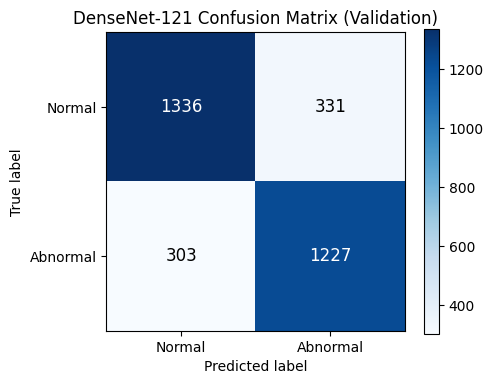

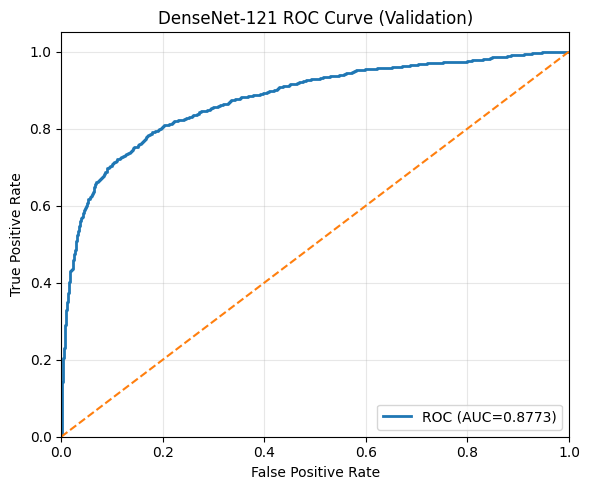

In [19]:
import numpy as np, torch, matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                             accuracy_score, precision_score, recall_score, f1_score)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ensure model is the same DenseNet-121 architecture you trained
# and is loaded with your best checkpoint (already done in your code).
densenet.to(device)
densenet.eval()

y_true, y_prob, y_pred = [], [], []
with torch.no_grad():
    for images, labels in valid_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        logits = densenet(images).squeeze(1)
        probs  = torch.sigmoid(logits)
        preds  = (probs > 0.5).long()

        y_true.extend(labels.cpu().numpy())
        y_prob.extend(probs.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

y_true = np.array(y_true)
y_prob = np.array(y_prob)
y_pred = np.array(y_pred)

# Scalar metrics
acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

print("=== DenseNet-121 Validation Metrics ===")
print(f"Accuracy   : {acc:.4f}")
print(f"Precision  : {prec:.4f}")
print(f"Recall     : {rec:.4f}")
print(f"F1-score   : {f1:.4f}")
print(f"AUC-ROC    : {roc_auc:.4f}\n")

print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Normal","Abnormal"]))

# Confusion matrix (display)
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('DenseNet-121 Confusion Matrix (Validation)')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ['Normal','Abnormal'])
plt.yticks(ticks, ['Normal','Abnormal'])
thresh = cm.max()/2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, int(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=12)
plt.ylabel('True label'); plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ROC curve (display)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC={roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('DenseNet-121 ROC Curve (Validation)')
plt.legend(loc='lower right'); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Step 6: Explainable AI (XAI) Integration - Fixed

Displaying Grad-CAM and Integrated Gradients for 3 validation samples...



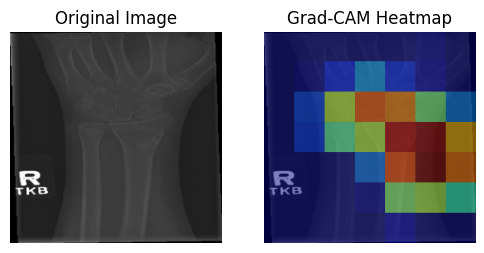

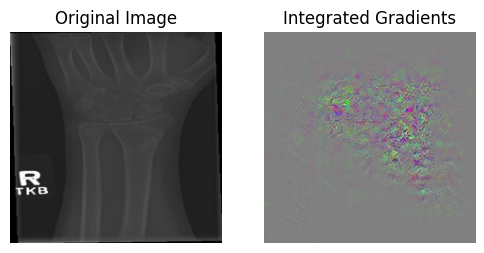

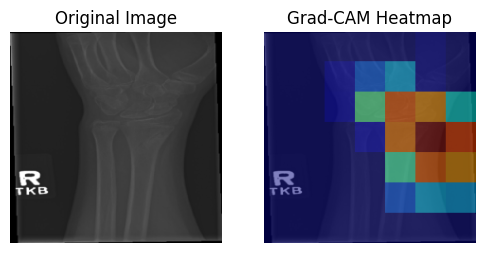

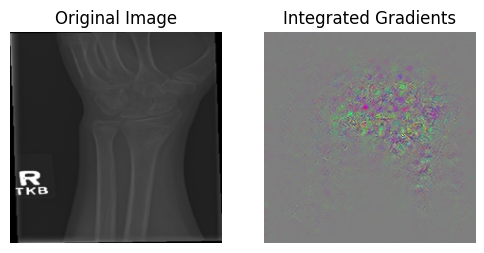

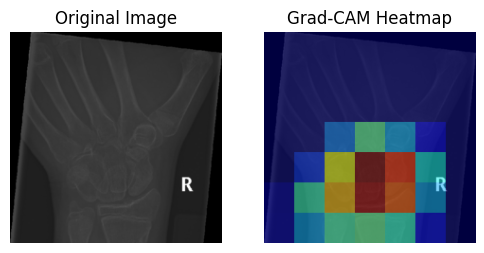

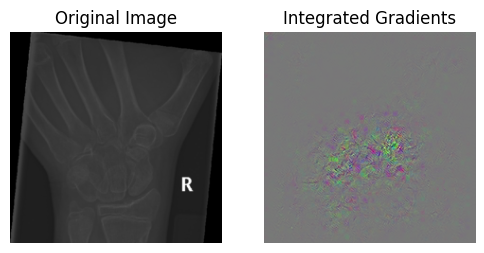

In [ ]:
# ============================================================
# Step 6: Explainable AI (XAI) Integration - Fixed
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients, LayerGradCam, LayerAttribution

# Ensure model is loaded and in evaluation mode
resnet_model.load_state_dict(torch.load("outputs/checkpoints/best_model.pth", map_location=device))
resnet_model.eval()

# Sample batch from validation set
images, labels = next(iter(valid_loader))
images, labels = images.to(device), labels.to(device)

# Initialize XAI methods
target_layer = resnet_model.layer4[-1]         # Last residual block for Grad-CAM
grad_cam = LayerGradCam(resnet_model, target_layer)
ig = IntegratedGradients(resnet_model)        # <-- Define IG object here

# -------------------------------
# Grad-CAM Visualization Function
# -------------------------------
def visualize_gradcam(img_tensor):
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension
    img_tensor.requires_grad = True

    # Grad-CAM for single-neuron output (target=0)
    attributions_gc = grad_cam.attribute(img_tensor, target=0)
    upsampled_gc = LayerAttribution.interpolate(attributions_gc, img_tensor.shape[2:])

    # Normalize heatmap
    heatmap = upsampled_gc.squeeze().detach().cpu().numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / (heatmap.max() + 1e-8)

    # Convert input tensor to displayable image
    orig_img = img_tensor.squeeze().detach().cpu().permute(1,2,0).numpy()
    orig_img = (orig_img - orig_img.min()) / (orig_img.max() - orig_img.min())

    # Plot original vs Grad-CAM
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(orig_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(orig_img)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')
    plt.show()

# -------------------------------
# Integrated Gradients Visualization Function
# -------------------------------
def visualize_integrated_gradients(img_tensor):
    img_tensor = img_tensor.unsqueeze(0)
    img_tensor.requires_grad = True

    # IG for single-neuron output (target=0)
    attributions_ig = ig.attribute(img_tensor, target=0, n_steps=50)

    # Normalize attribution
    attributions_ig = attributions_ig.squeeze().detach().cpu().numpy().transpose(1,2,0)
    attr_norm = (attributions_ig - attributions_ig.min()) / (attributions_ig.max() - attributions_ig.min() + 1e-8)

    # Convert tensor to NumPy image
    orig_img = img_tensor.squeeze().detach().cpu().permute(1,2,0).numpy()
    orig_img = (orig_img - orig_img.min()) / (orig_img.max() - orig_img.min())

    # Plot original vs IG heatmap
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(orig_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(attr_norm, cmap='hot')
    plt.title("Integrated Gradients")
    plt.axis('off')
    plt.show()

# -------------------------------
# Run XAI for 3 sample images
# -------------------------------
print("Displaying Grad-CAM and Integrated Gradients for 3 validation samples...\n")
for i in range(3):
    visualize_gradcam(images[i])
    visualize_integrated_gradients(images[i])


# Step 7: Model Evaluation and Metrics


=== Classification Metrics on Validation Set ===
Accuracy : 0.7804
Precision: 0.8884
Recall   : 0.6190
F1-score : 0.7296
AUC-ROC  : 0.8522

Detailed Classification Report:
              precision    recall  f1-score   support

      Normal       0.73      0.93      0.82      1667
    Abnormal       0.89      0.62      0.73      1530

    accuracy                           0.78      3197
   macro avg       0.81      0.77      0.77      3197
weighted avg       0.80      0.78      0.77      3197



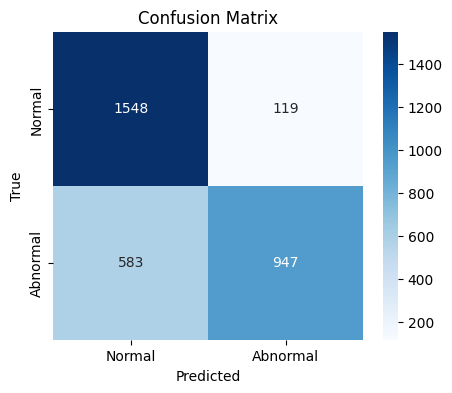

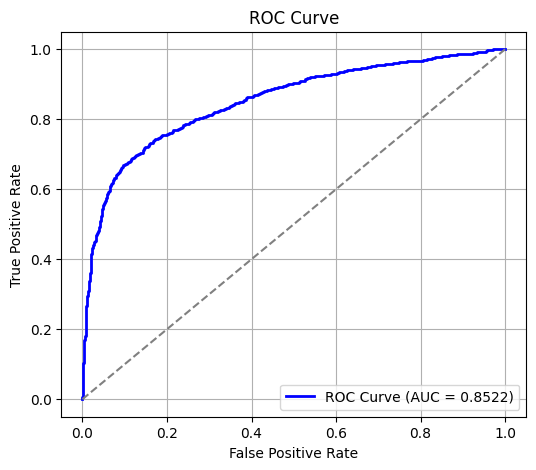

In [ ]:
# ============================================================
# Step 7: Model Evaluation and Metrics
# ============================================================

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load best trained model
model = resnet_model  # or densenet_model if evaluating DenseNet
model.load_state_dict(torch.load("outputs/checkpoints/best_model.pth", map_location=device))
model.eval()

# -------------------------------
# 7.1 Collect predictions and labels
# -------------------------------
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).squeeze()

        # Sigmoid to get probabilities for binary classification
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).long()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# -------------------------------
# 7.2 Compute Evaluation Metrics
# -------------------------------
accuracy = np.mean(all_preds == all_labels)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_probs)

print("\n=== Classification Metrics on Validation Set ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC-ROC  : {roc_auc:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["Normal", "Abnormal"]))

# -------------------------------
# 7.3 Confusion Matrix Visualization
# -------------------------------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# 7.4 ROC Curve Visualization
# -------------------------------
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Step 8: Saving Metrics and XAI Results for Report Generation

In [ ]:
# ============================================================
# Step 8: Saving Metrics and XAI Results for Report Generation
# ============================================================

import os
import pandas as pd

# Create output folders if not exist
metrics_dir = "outputs/metrics"
xai_dir = "outputs/xai_visuals"
os.makedirs(metrics_dir, exist_ok=True)
os.makedirs(xai_dir, exist_ok=True)

# -------------------------------
# 8.1 Save Evaluation Metrics
# -------------------------------

metrics_dict = {
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-score": [f1],
    "AUC-ROC": [roc_auc]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_path = os.path.join(metrics_dir, "validation_metrics.csv")
metrics_df.to_csv(metrics_path, index=False)

print(f"Validation metrics saved to: {metrics_path}")

# -------------------------------
# 8.2 Save Confusion Matrix as CSV
# -------------------------------
cm_df = pd.DataFrame(cm, index=["True_Normal","True_Abnormal"], columns=["Pred_Normal","Pred_Abnormal"])
cm_path = os.path.join(metrics_dir, "confusion_matrix.csv")
cm_df.to_csv(cm_path)
print(f"Confusion matrix saved to: {cm_path}")

# -------------------------------
# 8.3 Save Sample XAI Visualizations
# -------------------------------

def save_gradcam_and_ig(img_tensor, img_index):
    """
    Save Grad-CAM and IG heatmaps for reporting
    """
    img_tensor = img_tensor.unsqueeze(0).to(device)

    # Grad-CAM
    attributions_gc = grad_cam.attribute(img_tensor, target=0)
    heatmap_gc = LayerAttribution.interpolate(attributions_gc, img_tensor.shape[2:]).squeeze().detach().cpu().numpy()
    heatmap_gc = np.maximum(heatmap_gc, 0) / (heatmap_gc.max() + 1e-8)

    plt.imsave(os.path.join(xai_dir, f"gradcam_sample_{img_index}.png"), heatmap_gc, cmap='jet')

    # Integrated Gradients
    attributions_ig = ig.attribute(img_tensor, target=0, n_steps=50)
    heatmap_ig = attributions_ig.squeeze().detach().cpu().numpy().transpose(1,2,0)
    heatmap_ig = (heatmap_ig - heatmap_ig.min()) / (heatmap_ig.max() - heatmap_ig.min() + 1e-8)

    plt.imsave(os.path.join(xai_dir, f"integrated_gradients_sample_{img_index}.png"), heatmap_ig, cmap='hot')


# Save heatmaps for first 5 validation samples
print("\nSaving Grad-CAM and IG visualizations for first 5 validation samples...")
for i in range(5):
    save_gradcam_and_ig(images[i].cpu(), i+1)

print(f"XAI visualizations saved in: {xai_dir}")


Validation metrics saved to: outputs/metrics/validation_metrics.csv
Confusion matrix saved to: outputs/metrics/confusion_matrix.csv

Saving Grad-CAM and IG visualizations for first 5 validation samples...
XAI visualizations saved in: outputs/xai_visuals


# Display Saved Grad-CAM and Integrated Gradients Visuals

Found 5 Grad-CAM and 5 Integrated Gradients images.



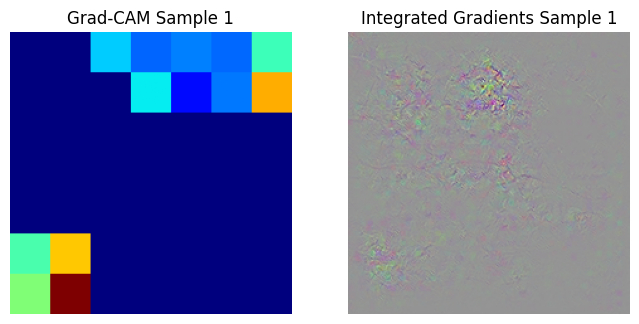

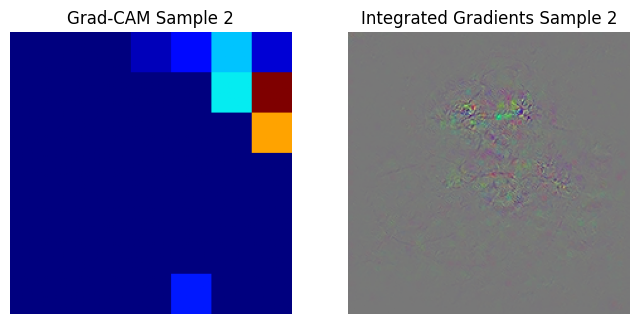

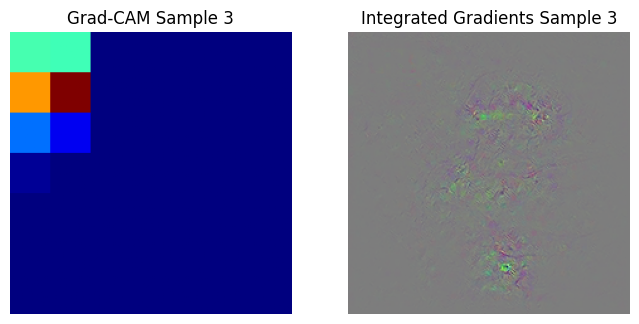

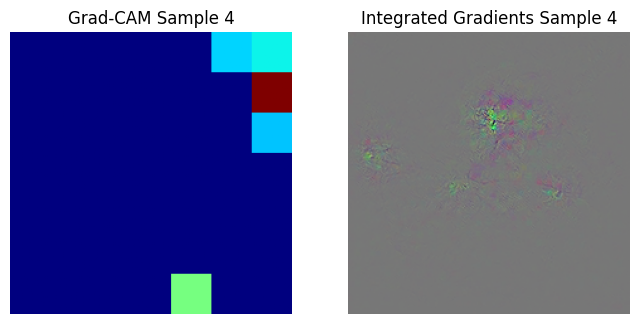

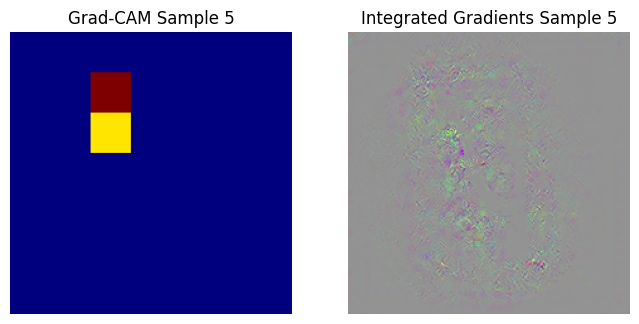

In [ ]:
# ============================================================
# Display Saved Grad-CAM and Integrated Gradients Visuals
# ============================================================

import matplotlib.pyplot as plt
import glob
import os

# Path to saved heatmaps
xai_dir = "outputs/xai_visuals"

# List all saved Grad-CAM and IG files
gradcam_files = sorted(glob.glob(os.path.join(xai_dir, "gradcam_sample_*.png")))
ig_files = sorted(glob.glob(os.path.join(xai_dir, "integrated_gradients_sample_*.png")))

print(f"Found {len(gradcam_files)} Grad-CAM and {len(ig_files)} Integrated Gradients images.\n")

# Display first 5 pairs (Grad-CAM + IG)
for i in range(min(5, len(gradcam_files))):
    plt.figure(figsize=(8,4))

    # Load Grad-CAM
    grad_img = plt.imread(gradcam_files[i])
    plt.subplot(1,2,1)
    plt.imshow(grad_img, cmap='jet')
    plt.title(f"Grad-CAM Sample {i+1}")
    plt.axis('off')

    # Load Integrated Gradients
    ig_img = plt.imread(ig_files[i])
    plt.subplot(1,2,2)
    plt.imshow(ig_img, cmap='hot')
    plt.title(f"Integrated Gradients Sample {i+1}")
    plt.axis('off')

    plt.show()


# Saving Best Model

In [ ]:
import os
import torch

# Ensure checkpoint folder exists
os.makedirs("outputs/checkpoints", exist_ok=True)

# Example: saving the trained ResNet50 model
model_save_path = "outputs/checkpoints/best_model.pth"

# Save only the model's state_dict (recommended for PyTorch deployment)
torch.save(resnet_model.state_dict(), model_save_path)
print(f"Model saved successfully at: {model_save_path}")

# If you want to save the entire model (less recommended)
# torch.save(resnet_model, "outputs/checkpoints/best_model_full.pth")


Model saved successfully at: outputs/checkpoints/best_model.pth


In [ ]:
import os
import pandas as pd

dataset_root = "/kaggle/input/mura-v11/MURA-v1.1"
splits = ["train", "valid"]

# Build list of all images
image_data = []

for split in splits:
    split_dir = os.path.join(dataset_root, split)
    for root, dirs, files in os.walk(split_dir):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                rel_path = os.path.relpath(os.path.join(root, file), dataset_root)
                image_data.append([split, rel_path])

# Create DataFrame
df = pd.DataFrame(image_data, columns=["split", "image"])
print("Total images found:", len(df))
print(df.head())

# Save CSVs
train_df = df[df["split"]=="train"][["image"]]
valid_df = df[df["split"]=="valid"][["image"]]

train_csv_path = "train_image_paths.csv"
valid_csv_path = "valid_image_paths.csv"

train_df.to_csv(train_csv_path, index=False)
valid_df.to_csv(valid_csv_path, index=False)

print(f"Train CSV saved: {train_csv_path}, rows={len(train_df)}")
print(f"Valid CSV saved: {valid_csv_path}, rows={len(valid_df)}")


Total images found: 40009
   split                                              image
0  train  train/XR_WRIST/patient07547/study1_negative/im...
1  train  train/XR_WRIST/patient07547/study1_negative/im...
2  train  train/XR_WRIST/patient07547/study1_negative/im...
3  train  train/XR_WRIST/patient07547/study2_negative/im...
4  train  train/XR_WRIST/patient07547/study2_negative/im...
Train CSV saved: train_image_paths.csv, rows=36812
Valid CSV saved: valid_image_paths.csv, rows=3197


Train images: 36812, Valid images: 3197
Sample valid images:
                                                    image
36812  valid/XR_WRIST/patient11268/study1_positive/im...
36813  valid/XR_WRIST/patient11268/study1_positive/im...
36814  valid/XR_WRIST/patient11268/study1_positive/im...
36815  valid/XR_WRIST/patient11302/study1_negative/im...
36816  valid/XR_WRIST/patient11380/study1_negative/im... 



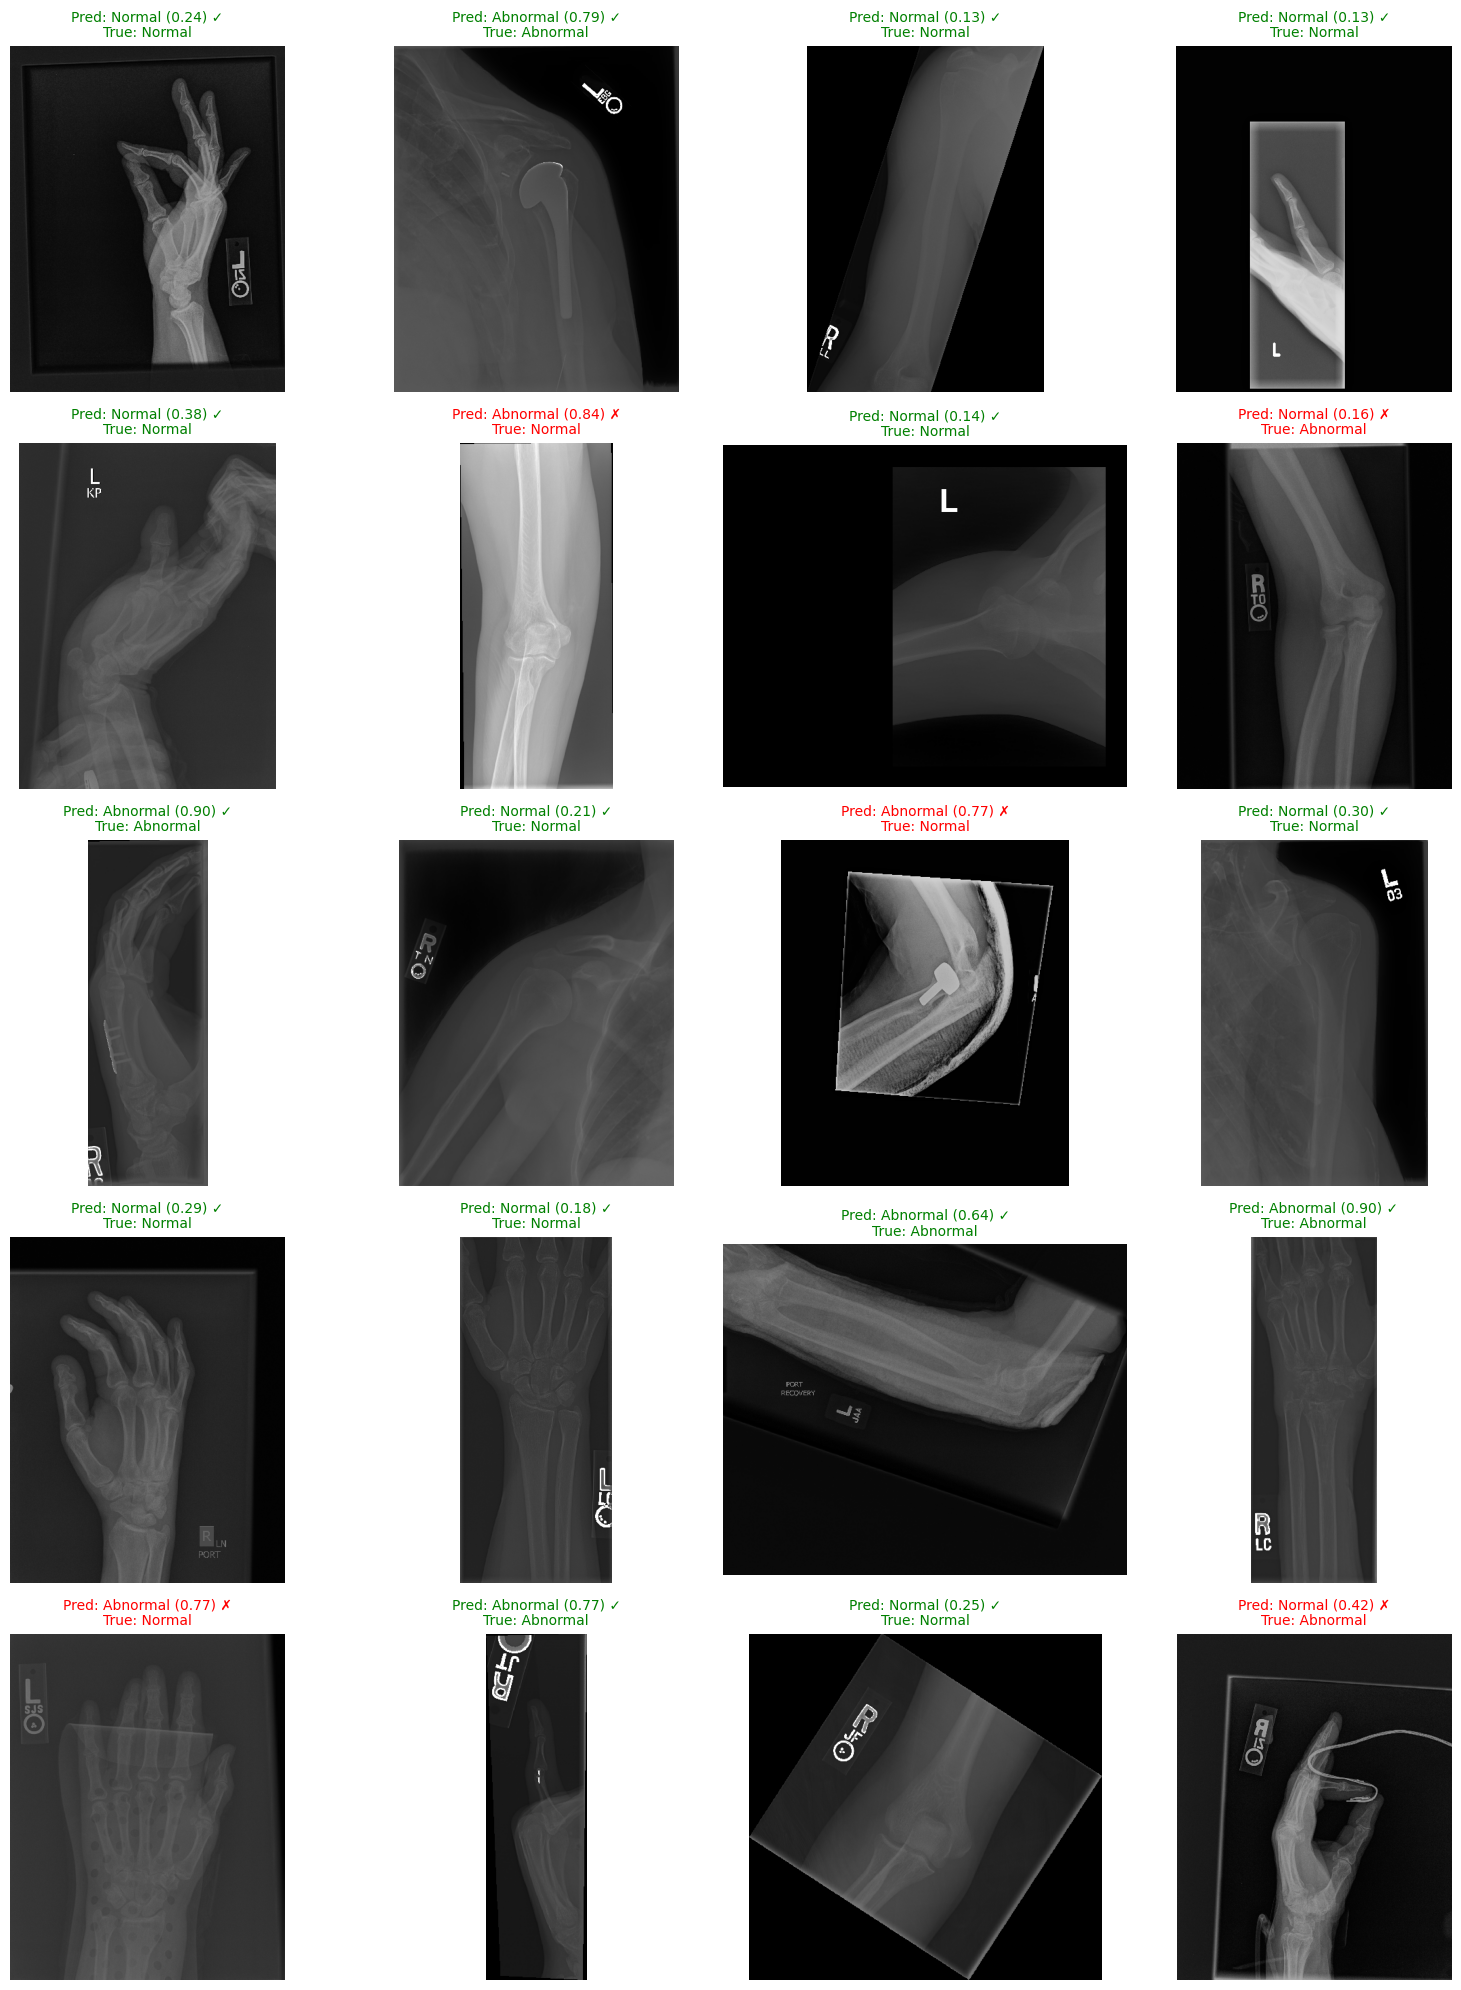

In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
from torchvision import models, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# -----------------------------
# Step 0: Paths
# -----------------------------
dataset_root = "/kaggle/input/mura-v11/MURA-v1.1"  # Path to dataset
model_path = "outputs/checkpoints/best_model.pth"  # Path to your trained model

# -----------------------------
# Step 1: Rebuild CSVs if Missing
# -----------------------------
splits = ["train", "valid"]
image_data = []

for split in splits:
    split_dir = os.path.join(dataset_root, split)
    for root, dirs, files in os.walk(split_dir):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                rel_path = os.path.relpath(os.path.join(root, file), dataset_root)
                image_data.append([split, rel_path])

df = pd.DataFrame(image_data, columns=["split", "image"])

train_df = df[df["split"] == "train"][["image"]]
valid_df = df[df["split"] == "valid"][["image"]]

train_csv_path = "train_image_paths.csv"
valid_csv_path = "valid_image_paths.csv"
train_df.to_csv(train_csv_path, index=False)
valid_df.to_csv(valid_csv_path, index=False)

print(f"Train images: {len(train_df)}, Valid images: {len(valid_df)}")
print("Sample valid images:\n", valid_df.head(), "\n")

# -----------------------------
# Step 2: Load Model
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(weights=None)
model.fc = nn.Linear(model.fc.in_features, 1)  # Binary classification
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# -----------------------------
# Step 3: Prepare Transform
# -----------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# -----------------------------
# Step 4: Sample 20 Validation Images
# -----------------------------
sample_df = valid_df.sample(n=20, random_state=42).reset_index(drop=True)

def classify_image(image_path):
    img = Image.open(os.path.join(dataset_root, image_path)).convert("RGB")
    tensor_img = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(tensor_img).squeeze()
        prob = torch.sigmoid(output).item()
        pred = 1 if prob > 0.5 else 0
        label = "Abnormal" if pred == 1 else "Normal"
    return img, label, prob, pred

def get_true_label(path):
    return 1 if "positive" in path else 0

# -----------------------------
# Step 5: Visualize 20 Predictions
# -----------------------------
fig, axes = plt.subplots(5, 4, figsize=(16, 20))
axes = axes.flatten()

for i in range(len(sample_df)):
    img_path = sample_df.loc[i, "image"]
    true_label = get_true_label(img_path)
    img, pred_label, prob, pred = classify_image(img_path)

    is_correct = (pred == true_label)
    mark = "✓" if is_correct else "✗"
    color = "green" if is_correct else "red"
    truth = "Abnormal" if true_label == 1 else "Normal"

    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(
        f"Pred: {pred_label} ({prob:.2f}) {mark}\nTrue: {truth}",
        color=color,
        fontsize=10
    )

for i in range(len(sample_df), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
